In [1]:
import pandas as pd
import numpy as np
from tqdm.auto import tqdm

In [2]:
data = np.load('../datasets/final_edges.dump', allow_pickle= True)

In [3]:
smiles = []
for i in data:
    smiles.append(i[0])
    smiles.append(i[1])
    

In [4]:
smiles = np.array(list(set(smiles)))

In [5]:
import networkx as nx

In [6]:
from karateclub import DeepWalk

In [12]:
G = nx.Graph()

In [13]:
obj = []
for i in tqdm(data):
    if i[2] == '1':
        obj.append((np.where(smiles == i[0])[0][0],np.where(smiles == i[1])[0][0]) )

  0%|          | 0/87153 [00:00<?, ?it/s]

In [14]:
obj

[(211, 215),
 (211, 125),
 (211, 168),
 (211, 380),
 (211, 285),
 (211, 17),
 (211, 254),
 (211, 42),
 (211, 54),
 (211, 76),
 (211, 231),
 (211, 329),
 (211, 217),
 (211, 180),
 (211, 363),
 (211, 61),
 (211, 99),
 (211, 51),
 (211, 85),
 (211, 129),
 (211, 299),
 (211, 325),
 (211, 161),
 (211, 202),
 (211, 185),
 (211, 163),
 (211, 143),
 (211, 66),
 (211, 96),
 (211, 34),
 (211, 67),
 (211, 400),
 (211, 403),
 (211, 245),
 (211, 359),
 (211, 110),
 (211, 116),
 (211, 392),
 (211, 45),
 (211, 379),
 (211, 203),
 (211, 159),
 (211, 79),
 (211, 413),
 (211, 364),
 (211, 155),
 (211, 360),
 (211, 184),
 (211, 225),
 (211, 279),
 (211, 264),
 (211, 172),
 (211, 106),
 (211, 39),
 (211, 124),
 (211, 70),
 (211, 239),
 (211, 259),
 (211, 196),
 (211, 247),
 (211, 348),
 (211, 267),
 (211, 269),
 (211, 335),
 (211, 68),
 (211, 80),
 (211, 278),
 (211, 189),
 (211, 333),
 (211, 206),
 (211, 49),
 (211, 277),
 (211, 95),
 (211, 109),
 (211, 268),
 (211, 331),
 (211, 356),
 (211, 63),
 (211, 

In [15]:
G.add_edges_from(obj)

In [ ]:
mapping = {}
for node in G.nodes():
    mapping[node] = str(node)

In [ ]:
model = DeepWalk()
model.fit(G)
embedding = model.get_embedding()

In [ ]:
Nodes = np.array(G.nodes())

In [ ]:
len(G.nodes())

In [ ]:
from rdkit import Chem
import rdkit
from rdkit.Chem import AllChem

In [22]:
graph_embeds_data = []
fingerprint_data = []
for i in tqdm(data):
    graph_embeds_data.append([
                     np.concatenate((embedding[np.where(smiles == i[0])[0][0]], 
                                     embedding[np.where(smiles == i[1])[0][0]] )), i[2] ])
    
    mol1 = Chem.MolFromSmiles(i[0])
    mol2 = Chem.MolFromSmiles(i[1])
    fp1 = np.array(rdkit.Chem.RDKFingerprint(mol1, maxPath=7, fpSize=512), dtype=object)
    fp2 = np.array(rdkit.Chem.RDKFingerprint(mol2, maxPath=7, fpSize=512), dtype=object)
    fingerprint_data.append([
        np.concatenate(( fp1, fp2)), i[2]
    ])

  0%|          | 0/87153 [00:00<?, ?it/s]

In [23]:
fingerprint_data = np.array(fingerprint_data, dtype=object)
graph_embeds_data = np.array(graph_embeds_data)
fingerprint_data= np.array(fingerprint_data)

/home2/kanakala.ganesh/miniconda3/envs/fast/lib/python3.6/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [24]:
graph_embeds_data.shape

(87153, 2)

In [25]:
# len(fingerprint_data[0][0])

In [26]:
final_data = []
for i in range(len(fingerprint_data)):
    final_data.append([np.concatenate((fingerprint_data[i][0], graph_embeds_data[i][0])), fingerprint_data[i][1]])

In [27]:
final_data = np.array(final_data)

/home2/kanakala.ganesh/miniconda3/envs/fast/lib/python3.6/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [28]:
X = []
y = []
for i in tqdm(fingerprint_data):
    X.append(i[0])
    y.append(i[1])

  0%|          | 0/87153 [00:00<?, ?it/s]

In [29]:
X = np.array(X)
y = np.array(y)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [31]:
X_train.shape

(69722, 1024)

In [32]:
y_train.shape

(69722,)

In [33]:
from sklearn.manifold import TSNE

In [34]:
X_train

array([[0, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 1, 1],
       [1, 0, 0, ..., 1, 1, 1]], dtype=object)

In [35]:
X_train = np.asarray(X_train, dtype='float64')

In [36]:
import seaborn as sns

In [37]:
tsne = TSNE(n_components=3)
embeds = tsne.fit_transform(X_train[:10000])
df = pd.DataFrame(embeds, columns=['x','y','z'])
df['b'] = y_train[:10000]


KeyboardInterrupt: 

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,15)})
sns.set_style("whitegrid")
sns.scatterplot(data=df, x='x', y='y', z='z', s=70 ,hue='b',alpha=0.5, projection='3d')

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['x']
y = df['y']
z = df['z']
b = df['b']
ax.scatter(x, y, z)

plt.show()

In [10]:
!pip install Node2Vec
from node2vec import Node2Vec


In [16]:
node2vec = Node2Vec(G, dimensions=128, walk_length=30, num_walks=200, workers=4)

Computing transition probabilities:   0%|          | 0/418 [00:00<?, ?it/s]

In [17]:
model = node2vec.fit(window=10, min_count=1, batch_words=4) 

In [18]:
from node2vec.edges import HadamardEmbedder, AverageEmbedder

edges_embs = HadamardEmbedder(keyed_vectors=model.wv)

In [19]:
edges_kv = edges_embs.as_keyed_vectors()

Generating edge features: 100%|██████████| 87571/87571.0 [00:01<00:00, 57958.52it/s]


In [26]:
len(edges_kv

87571

In [55]:
edges_kv[0].shape

(128,)

In [56]:
edge_embeds = []
for edge in data:
    smi1 = np.where(smiles == edge[0])[0][0]
    smi2 = np.where(smiles == edge[1])[0][0]
    edge_embeds.append(edges_embs[(str(smi1),str(smi2))])
    
    

In [66]:
edges_embeds[0]

array([array([-2.17159308e-04,  1.19520649e-02,  1.21013090e-05,  1.06762629e-03,
        1.12482090e-03,  3.00126895e-03, -5.62214106e-03,  2.54298723e-03,
        1.90853013e-03, -3.39189405e-03,  7.91986997e-04, -2.83880951e-03,
        3.49560101e-03, -8.34061764e-03,  2.11084038e-02,  7.88765587e-03,
        8.13813414e-03, -9.40347556e-04,  4.84256027e-03, -2.26313341e-03,
       -8.63061845e-03,  2.21441011e-03,  3.47941444e-04,  8.08356237e-03,
        6.42668642e-03, -3.51554918e-04,  1.31811388e-03, -7.39693036e-03,
        1.96387595e-03,  8.82788387e-04,  3.63382548e-02, -8.20453838e-03,
        3.37228965e-04, -3.67212400e-04,  6.22580387e-03,  1.30214775e-02,
        9.83984675e-03, -3.37872596e-04, -1.54241649e-02,  2.06945976e-03,
        4.53959545e-03,  4.29751817e-04,  4.27938811e-03,  6.61826169e-04,
        1.07835932e-02,  1.08952569e-02,  1.26283951e-04,  3.73129658e-02,
        1.88390482e-02, -4.77426802e-04,  4.83411597e-04, -4.97420831e-03,
        7.07708159

In [50]:
edges_embeds = []
for i in G.nodes():
    for j in G.nodes():
        if i > j:
            if (i,j) in G.edges():
                edges_embeds.append([edges_embs[(str(i),str(j))], 1])
            else:
                edges_embeds.append([edges_embs[(str(i),str(j))], 0])


In [51]:
edges_embeds = np.array(edges_embeds, dtype=object)

In [53]:
edges_embeds[0]

array([array([-2.17159308e-04,  1.19520649e-02,  1.21013090e-05,  1.06762629e-03,
        1.12482090e-03,  3.00126895e-03, -5.62214106e-03,  2.54298723e-03,
        1.90853013e-03, -3.39189405e-03,  7.91986997e-04, -2.83880951e-03,
        3.49560101e-03, -8.34061764e-03,  2.11084038e-02,  7.88765587e-03,
        8.13813414e-03, -9.40347556e-04,  4.84256027e-03, -2.26313341e-03,
       -8.63061845e-03,  2.21441011e-03,  3.47941444e-04,  8.08356237e-03,
        6.42668642e-03, -3.51554918e-04,  1.31811388e-03, -7.39693036e-03,
        1.96387595e-03,  8.82788387e-04,  3.63382548e-02, -8.20453838e-03,
        3.37228965e-04, -3.67212400e-04,  6.22580387e-03,  1.30214775e-02,
        9.83984675e-03, -3.37872596e-04, -1.54241649e-02,  2.06945976e-03,
        4.53959545e-03,  4.29751817e-04,  4.27938811e-03,  6.61826169e-04,
        1.07835932e-02,  1.08952569e-02,  1.26283951e-04,  3.73129658e-02,
        1.88390482e-02, -4.77426802e-04,  4.83411597e-04, -4.97420831e-03,
        7.07708159

In [24]:
ls = []
for i in edges_embeds:
    ls.append(np.array(i[0], dtype='float64'))
ls= np.array(ls)  

In [25]:
ls.shape

(174306, 128)

In [ ]:
tsne = TSNE(n_components=2)
embeds = tsne.fit_transform(ls[:10000])
df = pd.DataFrame(embeds, columns=['x','y'])
df['z'] = edges_embeds[:10000,1]
import seaborn as sns
sns.set(rc={'figure.figsize':(15,15)})
sns.set_style("whitegrid")
sns.scatterplot(data=df, x='x', y='y',  hue='z',alpha=0.5)

In [ ]:
embeds

In [ ]:
from sklearn.ensemble import RandomForestClassifier
reg_rf = RandomForestClassifier()
reg_rf.fit(X_train, y_train)
y_pred = reg_rf.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.classification_report(y_test, y_pred))

In [ ]:
print("roc_auc_score: ", metrics.roc_auc_score(y_test, y_pred))


In [ ]:
print("f1 score: ", metrics.f1_score(y_test, y_pred , pos_label='1'))

In [ ]:
metrics.plot_confusion_matrix(reg_rf, X_test, y_test)

In [24]:
from karateclub import Graph2Vec

In [25]:
g2v = Graph2Vec()

In [45]:
g2v.fit([G])

In [47]:
a = g2v.get_embedding()

In [49]:
a.shape

(1, 128)

In [11]:
def get_neighbors(node_list, graph):
    ls =[]
    for node in node_list:
        for n in graph.neighbors(node):
            ls.append(n)
    return list(set(ls))
    
def get_subgraph_nodes(node, depth, graph):
    neibs = set()
    root = [node]
    for d in range(depth):
        nodes = get_neighbors(root, graph)
        root = nodes
        neibs = neibs.union(set(nodes))
        
    return list(neibs)

In [12]:
graph = nx.Graph()

In [13]:
graph.add_nodes_from([2,3,4,5,6])
graph.add_edges_from([(1,2),(4,5),(3,5),(2,3),(5,6)])
graph.add_edge(4,6)
graph.add_edge(4,2)


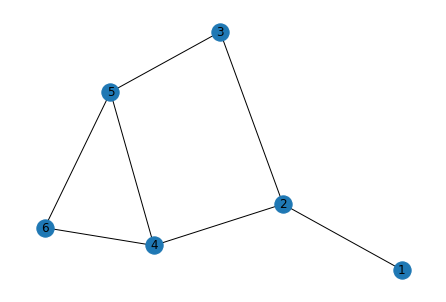

In [14]:
nx.draw(graph, with_labels=True)

In [44]:
nx.ego_graph(graph, 2, radius=1).nodes

NodeView((2, 3, 4, 1))

In [66]:
def get_graph_embeds(G, d):
    sub_graph_list = []
    for node in G.nodes():
        sub_graph = nx.ego_graph(G, node, radius=d)
        sub_graph_list.append(nx.convert_node_labels_to_integers(sub_graph))
    
    g2v = Graph2Vec()
    g2v.fit(sub_graph_list)
    node_embeds = g2v.get_embedding()
    return node_embeds

In [67]:
DEPTH = 2
embeds = get_graph_embeds(G, DEPTH)

AssertionError: The node indexing is wrong.

In [ ]:
embeds.shape

In [62]:
len(G.edges())

29217